In [5]:
health_data = read.csv("health_data.csv")

In [6]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(GGally)
library(fastDummies)
library(reshape2)

In [7]:
head(health_data)
summary(health_data)



health_data= health_data %>% separate(BloodPressure, c("BloodPressureNumerator","BloodPressureDenominator"),"/")

health_data$`BloodPressureNumerator` <- as.numeric(as.character(health_data$`BloodPressureNumerator`))
health_data$`BloodPressureDenominator` <- as.numeric(as.character(health_data$`BloodPressureDenominator`))

health_data %>% summarise_all(~sum(is.na(.)))



numeric_data = health_data[,unlist(lapply(health_data, is.numeric))]
cat_data = health_data[,unlist(lapply(health_data, is.character))]


,PatientID,Age,Gender,BMI,SmokingStatus,AlcoholConsumption,ExerciseFrequency,CholesterolLevel,BloodPressure,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,AnnualCheckups,GeneticRisk,HealthcareCost,Outcome
,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,1,82,Male,27.72798,Never,Never,Never,170.5041,124/80,No,Yes,Low,Average,Medium,2,0.89,20974.84,Healthy
2,2,62,Female,26.12258,Former,Never,Sometimes,183.7046,155/75,Yes,No,Low,Good,Medium,1,0.95,12693.40,Healthy
3,3,26,Female,37.61520,Never,Occasionally,Never,256.5829,100/96,No,No,Medium,Average,High,1,1.00,13103.52,Critical
4,4,64,Male,33.12029,Current,Never,Sometimes,163.4861,159/82,No,No,Medium,Average,Medium,3,1.00,15920.20,Healthy
5,5,34,Female,30.66780,Never,Regularly,Sometimes,247.2195,131/80,No,No,Medium,Average,High,4,1.00,18529.89,Critical
6,6,34,Male,28.12764,Never,Never,Sometimes,173.1878,144/93,Yes,No,Medium,Poor,Medium,3,0.97,12930.51,Healthy


   PatientID           Age           Gender               BMI       
 Min.   :     1   Min.   :18.00   Length:300000      Min.   :15.00  
 1st Qu.: 75001   1st Qu.:35.00   Class :character   1st Qu.:26.63  
 Median :150001   Median :53.00   Mode  :character   Median :30.13  
 Mean   :150001   Mean   :53.49                      Mean   :30.07  
 3rd Qu.:225000   3rd Qu.:72.00                      3rd Qu.:33.62  
 Max.   :300000   Max.   :89.00                      Max.   :40.00  
 SmokingStatus      AlcoholConsumption ExerciseFrequency  CholesterolLevel
 Length:300000      Length:300000      Length:300000      Min.   :100.0   
 Class :character   Class :character   Class :character   1st Qu.:192.5   
 Mode  :character   Mode  :character   Mode  :character   Median :214.5   
                                                          Mean   :214.6   
                                                          3rd Qu.:236.6   
                                                          Max.   :3

PatientID,Age,Gender,BMI,SmokingStatus,AlcoholConsumption,ExerciseFrequency,CholesterolLevel,BloodPressureNumerator,BloodPressureDenominator,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,AnnualCheckups,GeneticRisk,HealthcareCost,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


EDA

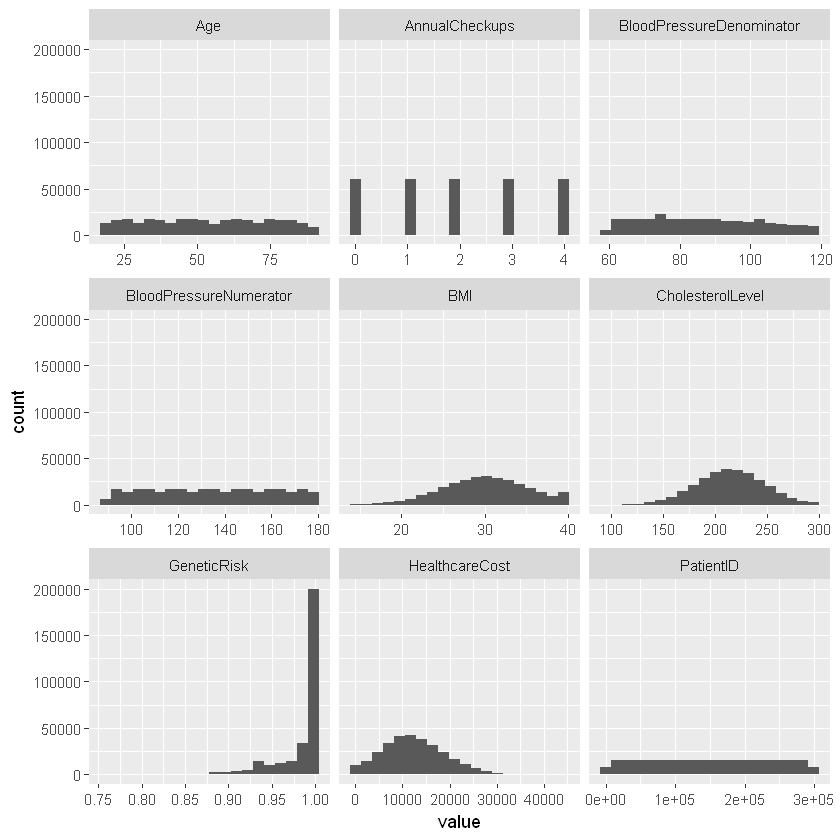

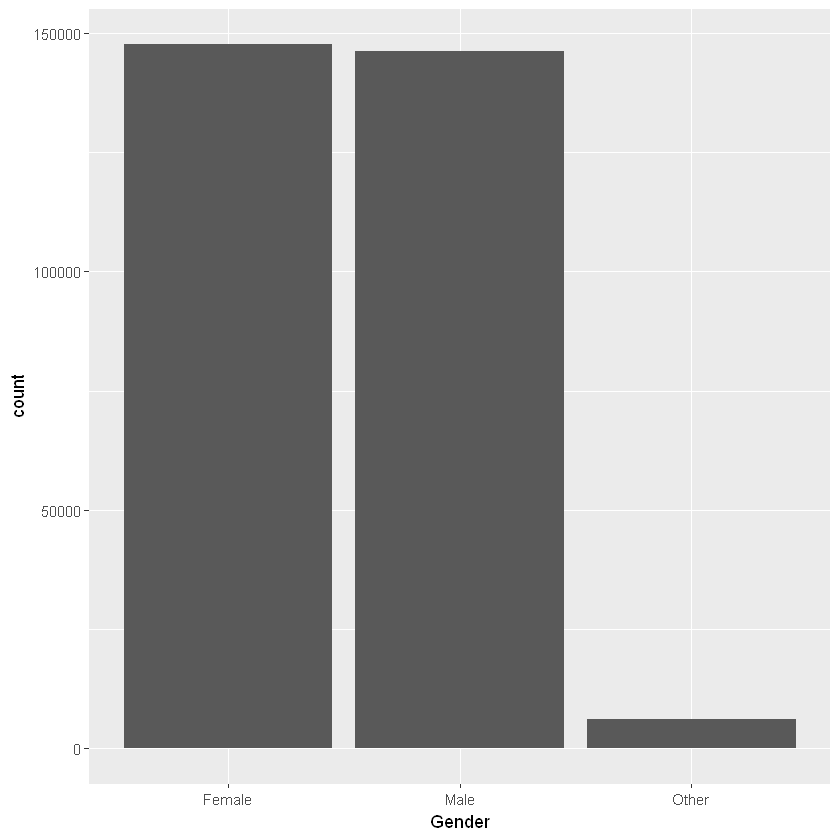

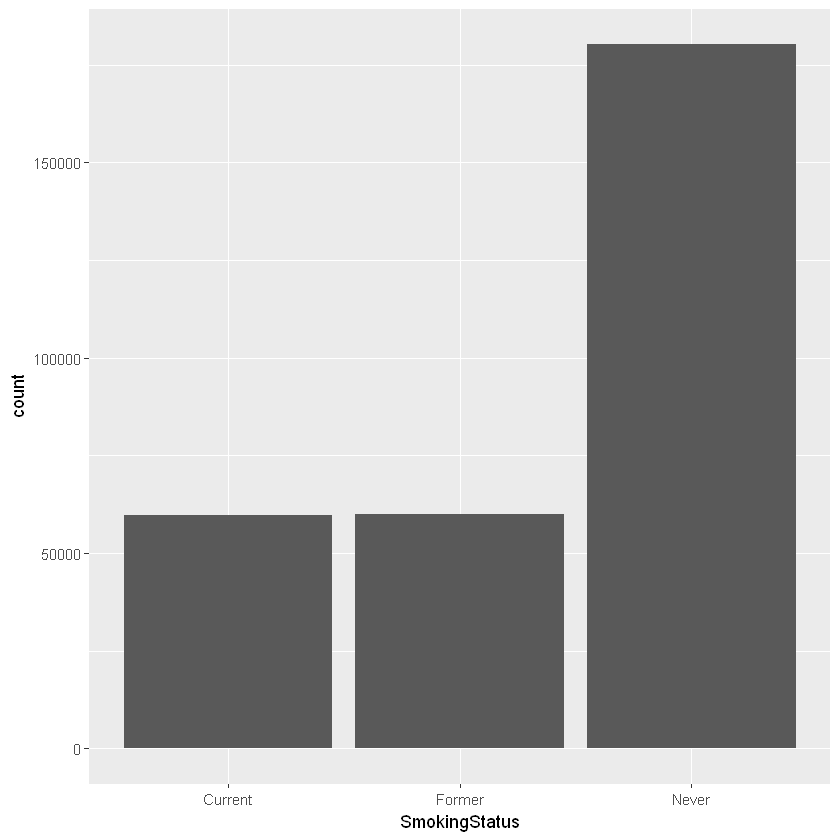

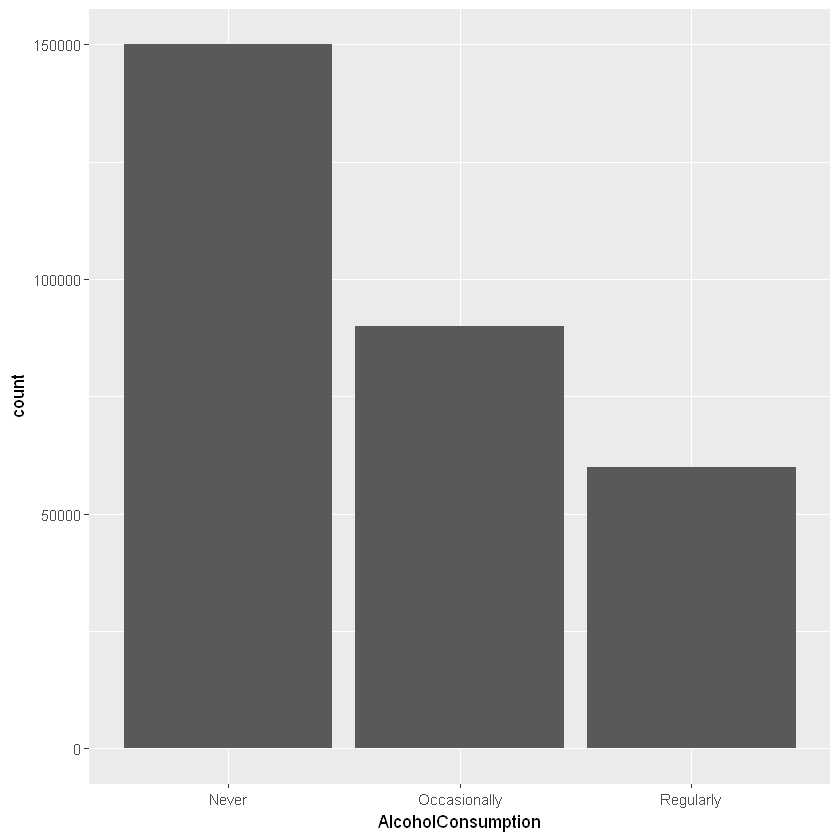

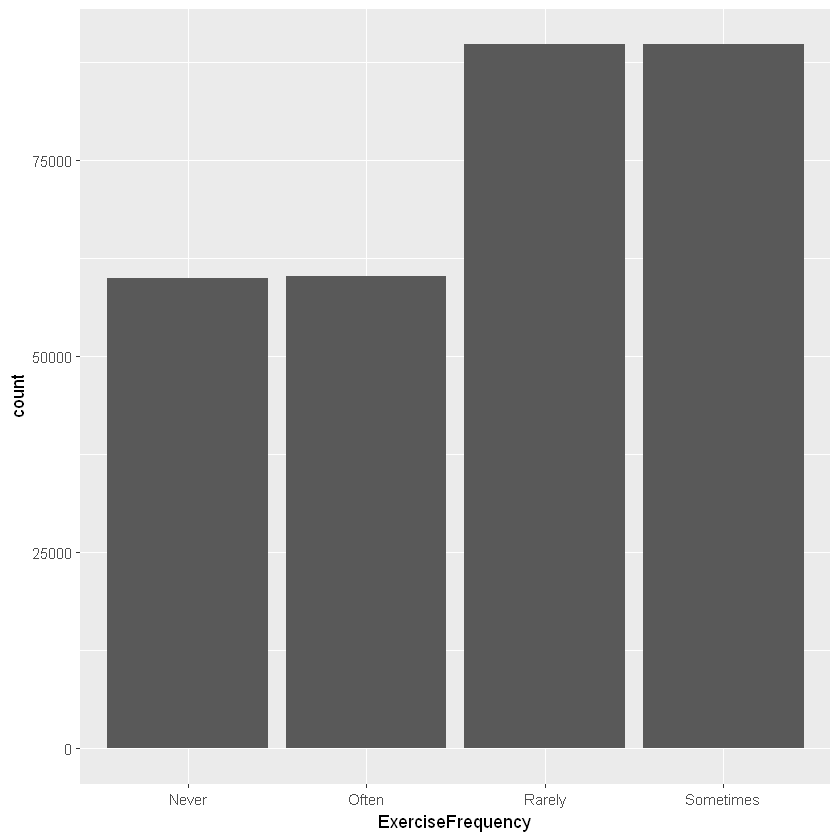

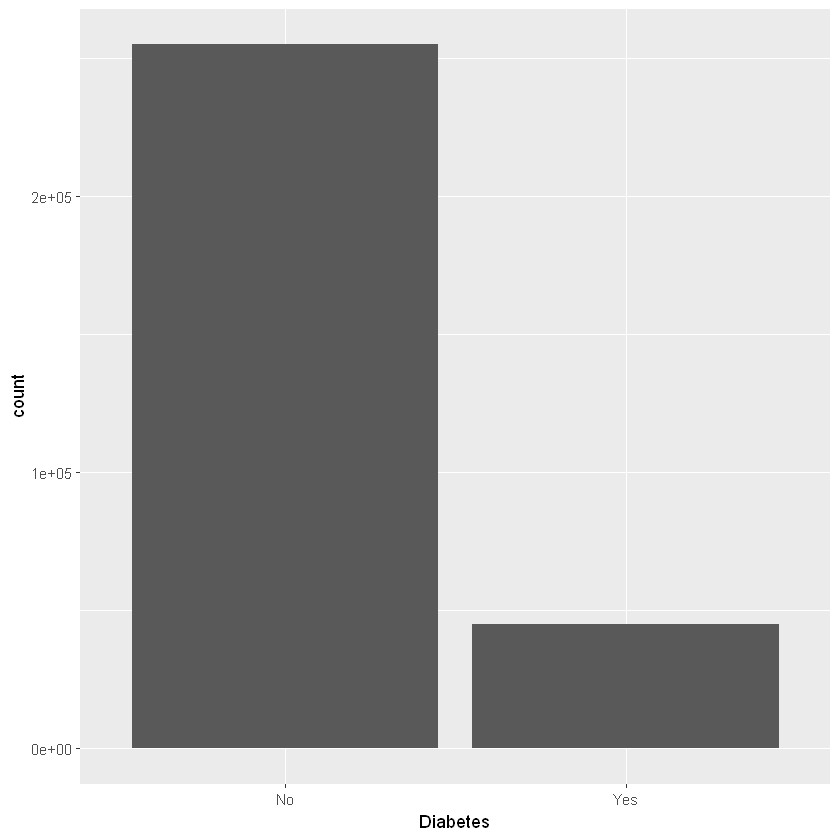

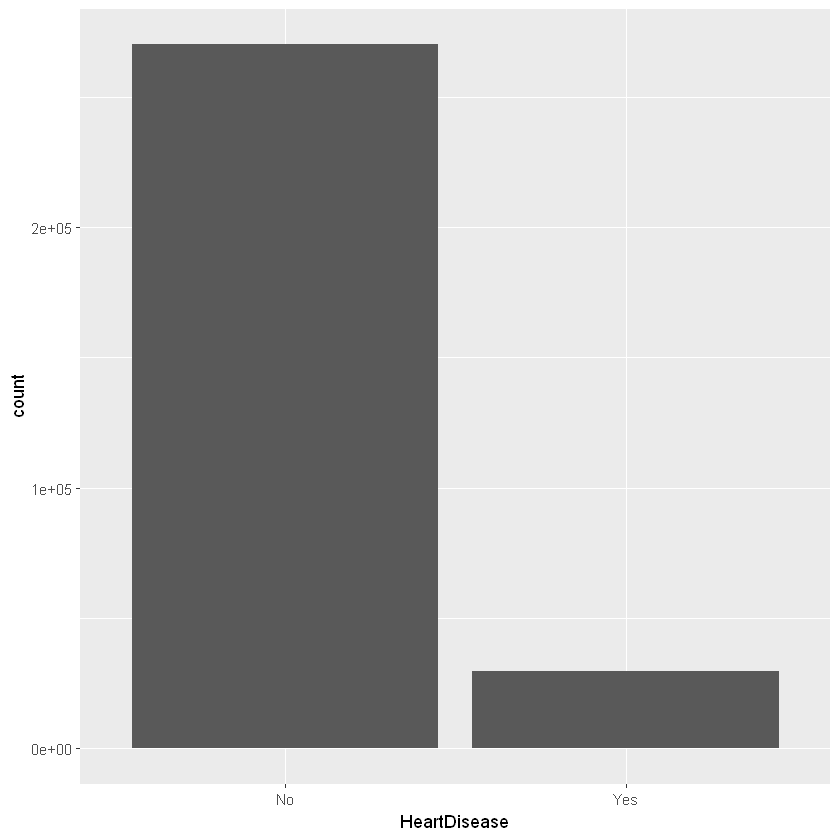

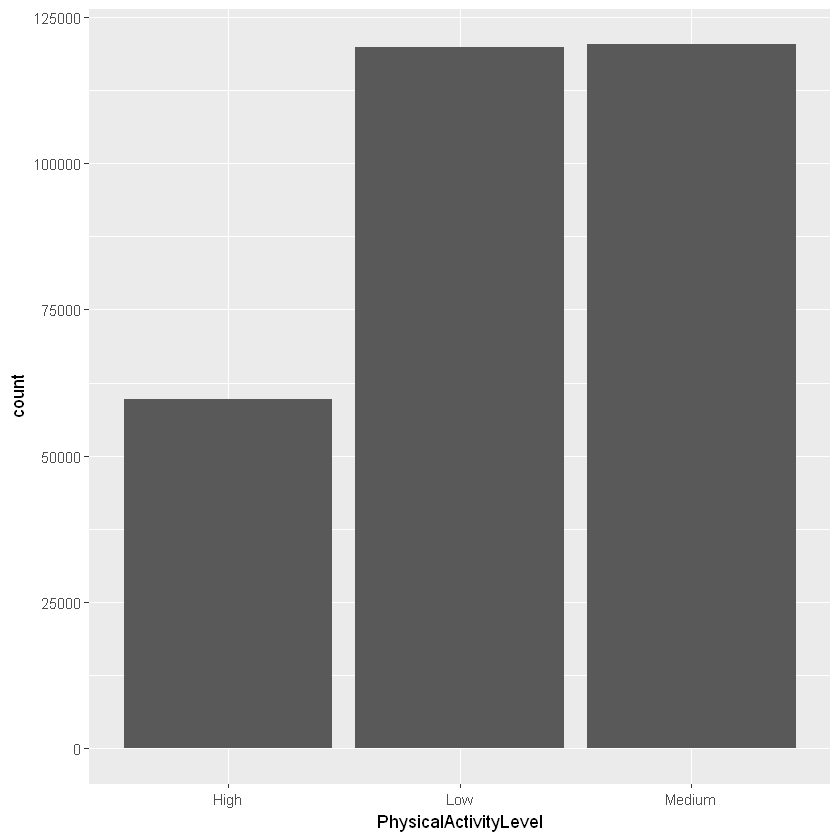

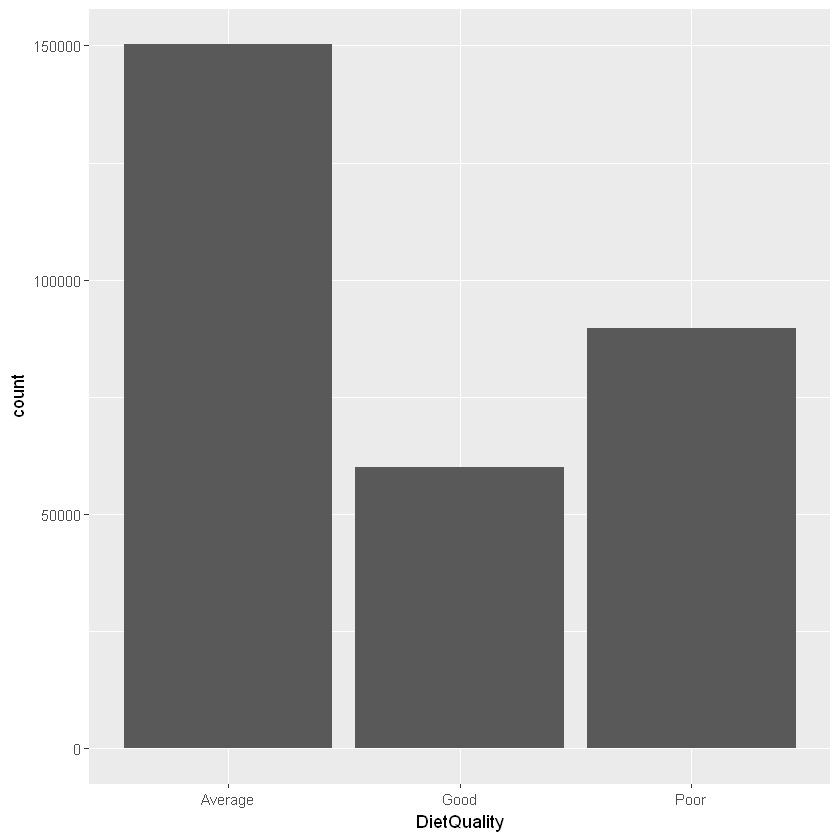

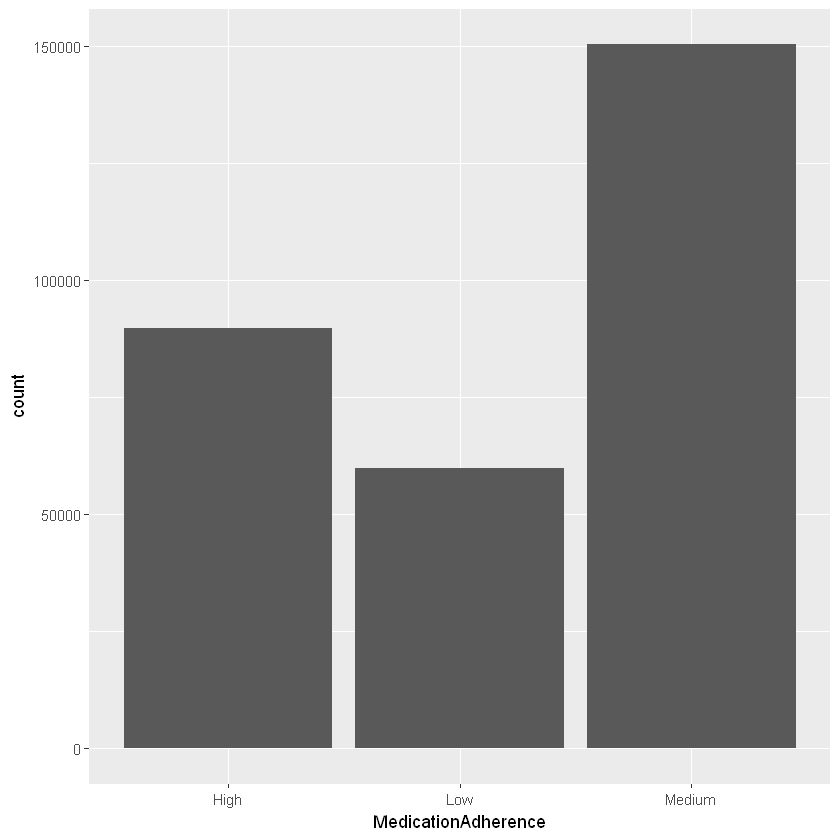

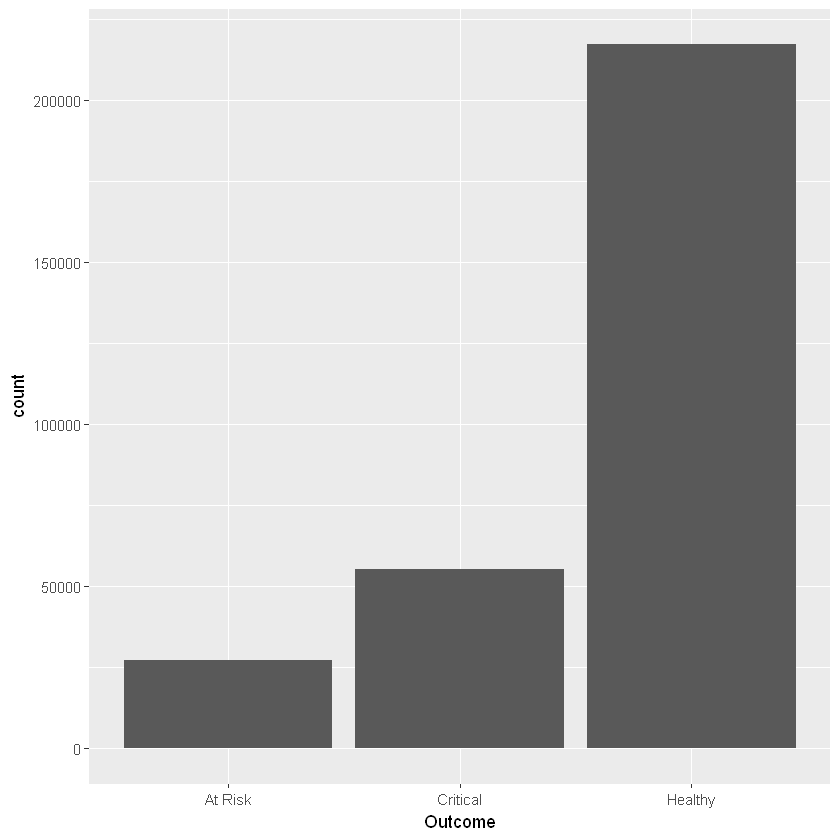

In [104]:
ggplot(gather(numeric_data),aes(value)) + geom_histogram(bins = 20) + facet_wrap(~key,scales = "free_x")

for (e in colnames(cat_data)){
    plots = ggplot(cat_data,aes_string(x=e)) +geom_bar()
    print(plots)
}




,PatientID,Age,BMI,CholesterolLevel,BloodPressureNumerator,BloodPressureDenominator,AnnualCheckups,GeneticRisk,HealthcareCost
PatientID,1.0000000000,-0.0035904652,0.0020946681,7.219769e-04,-7.620670e-04,1.972583e-03,2.048590e-03,-0.001142953,-0.002123729
Age,-0.0035904652,1.0000000000,0.0021220258,5.568294e-03,-3.512299e-04,2.800764e-03,2.552506e-03,0.001070987,0.000228597
BMI,0.0020946681,0.0021220258,1.0000000000,2.407180e-02,-7.542906e-04,2.992010e-04,2.273552e-03,0.017387906,0.027923690
CholesterolLevel,0.0007219769,0.0055682943,0.0240717996,1.000000e+00,4.800351e-05,8.554731e-04,-1.534916e-03,0.074641943,0.142667505
BloodPressureNumerator,-0.0007620670,-0.0003512299,-0.0007542906,4.800351e-05,1.000000e+00,2.067876e-01,7.207095e-04,0.001187322,0.001834840
BloodPressureDenominator,0.0019725830,0.0028007638,0.0002992010,8.554731e-04,2.067876e-01,1.000000e+00,-5.701872e-05,-0.003064295,-0.001231840
AnnualCheckups,0.0020485901,0.0025525059,0.0022735524,-1.534916e-03,7.207095e-04,-5.701872e-05,1.000000e+00,-0.001045505,0.001276601
GeneticRisk,-0.0011429531,0.0010709875,0.0173879065,7.464194e-02,1.187322e-03,-3.064295e-03,-1.045505e-03,1.000000000,0.187852908
HealthcareCost,-0.0021237294,0.0002285970,0.0279236904,1.426675e-01,1.834840e-03,-1.231840e-03,1.276601e-03,0.187852908,1.000000000


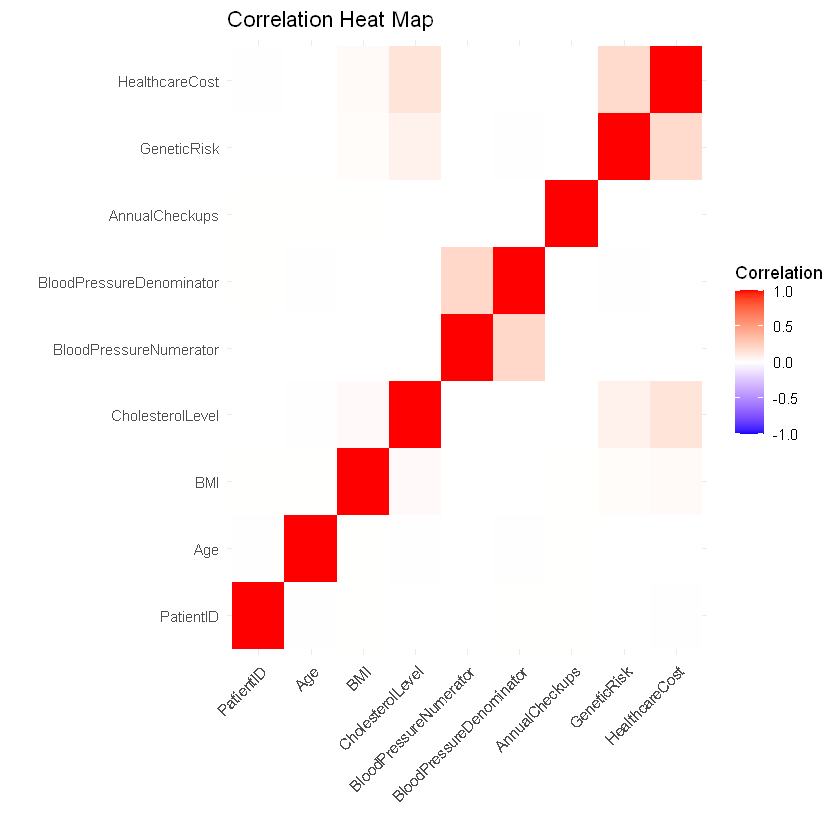

In [143]:
correlation_matrix = cor(numeric_data)
melted_corr_matrix = melt(correlation_matrix)
correlation_matrix
ggplot(data = melted_corr_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), 
                       name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heat Map", x = "", y = "")

In [10]:
health_data_clean = health_data

In [11]:
health_data_clean$Gender = factor(health_data_clean$Gender,level = c('Male','Female',"Other"))
health_data_clean$SmokingStatus = factor(health_data_clean$SmokingStatus,levels = c('Never','Former','Current'))
health_data_clean$AlcoholConsumption = factor(health_data_clean$AlcoholConsumption,levels = c('Never','Occasionally','Regularly'))
health_data_clean$ExerciseFrequency = factor(health_data_clean$ExerciseFrequency,levels = c('Never','Sometimes','Often','Rarely'))
health_data_clean$PhysicalActivityLevel = factor(health_data_clean$PhysicalActivityLevel,levels = c('Low','Medium','High'))
health_data_clean$DietQuality = factor(health_data_clean$DietQuality,levels = c('Average','Good','Poor'))
health_data_clean$MedicationAdherence = factor(health_data_clean$MedicationAdherence,levels = c('Medium','High','Low'))
health_data_clean$Outcome = factor(health_data_clean$Outcome,levels = c('Healthy','Critical','At Risk'))

In [12]:
library(fastDummies)

In [13]:
health_data_lm = dummy_cols(health_data_clean,select_columns = c("Gender","SmokingStatus","AlcoholConsumption","ExerciseFrequency","Diabetes","HeartDisease","PhysicalActivityLevel","DietQuality","MedicationAdherence","Outcome"))
health_data_lm = subset(health_data_lm, select=-c(Gender,SmokingStatus,AlcoholConsumption,ExerciseFrequency,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,Outcome,PatientID))
names(health_data_lm)[names(health_data_lm) == 'Outcome_At Risk'] <- 'Outcome_at_risk'

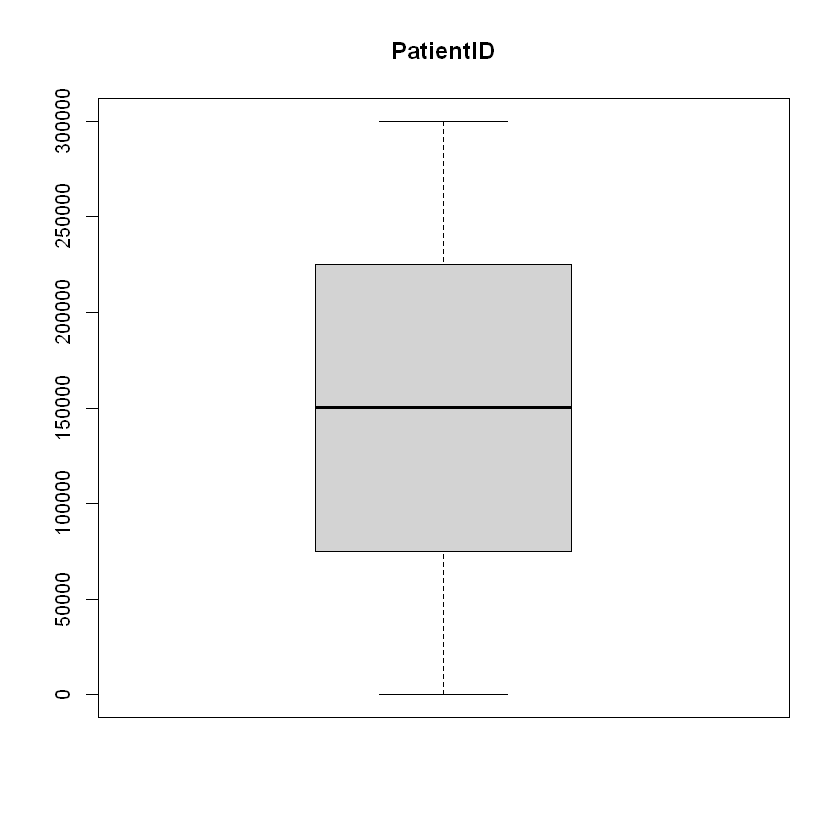

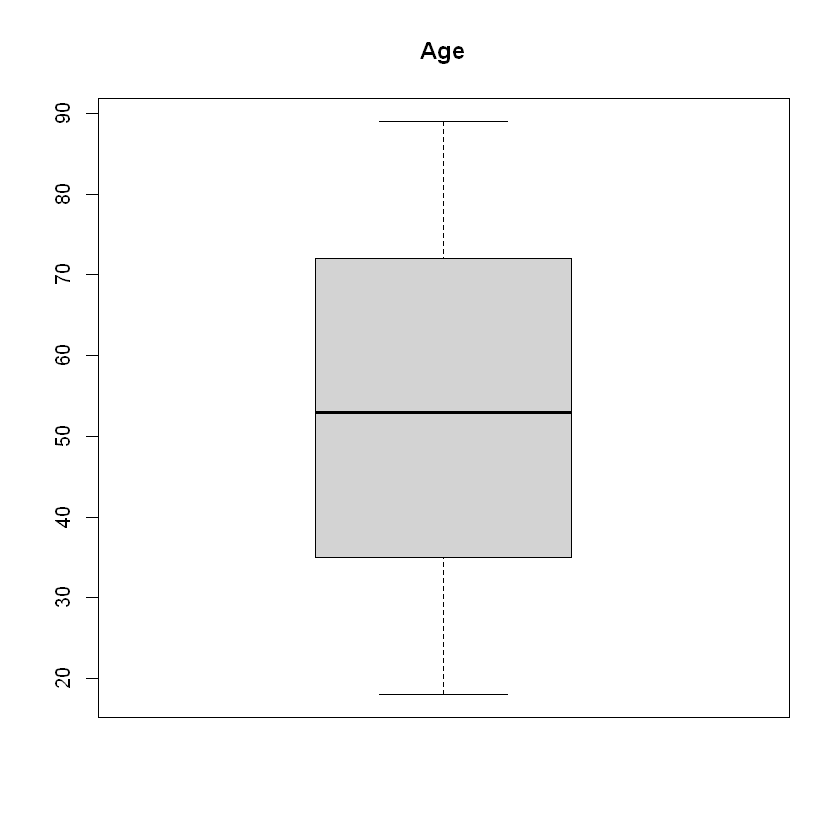

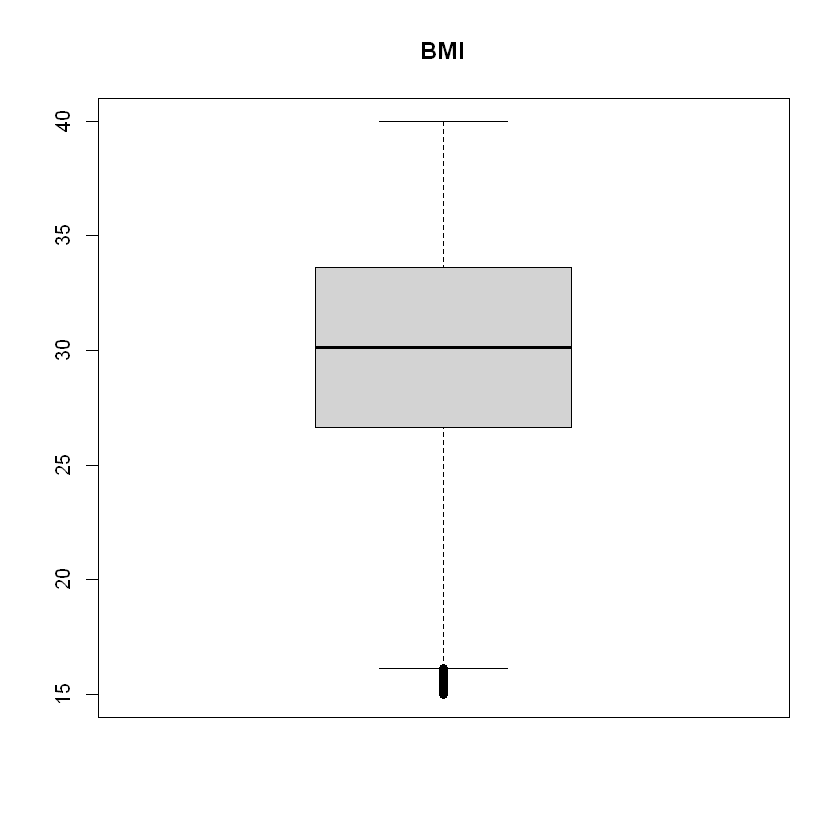

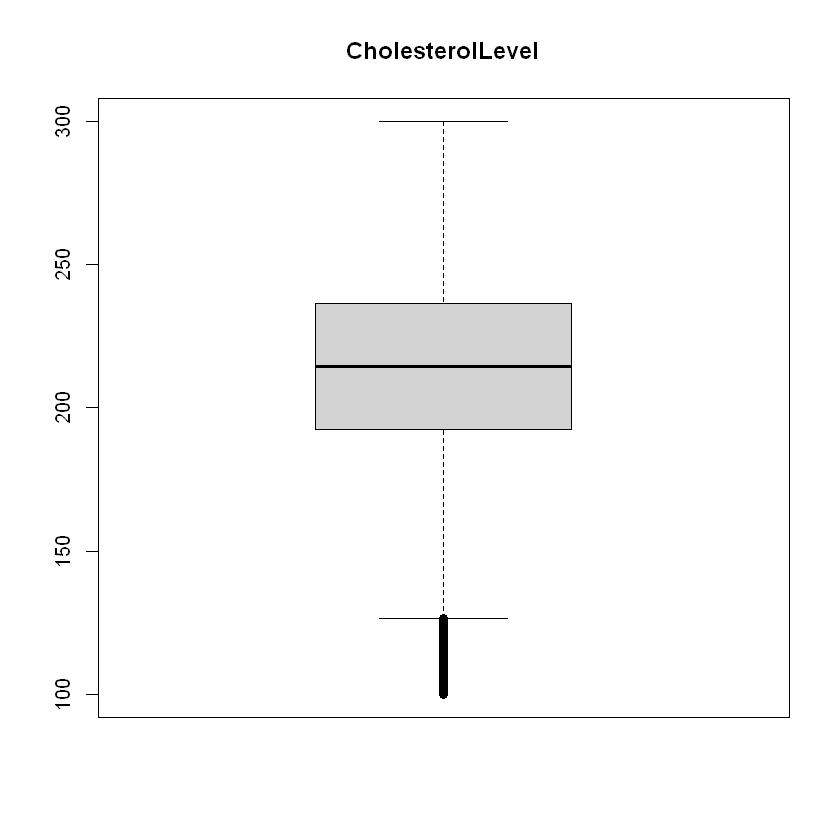

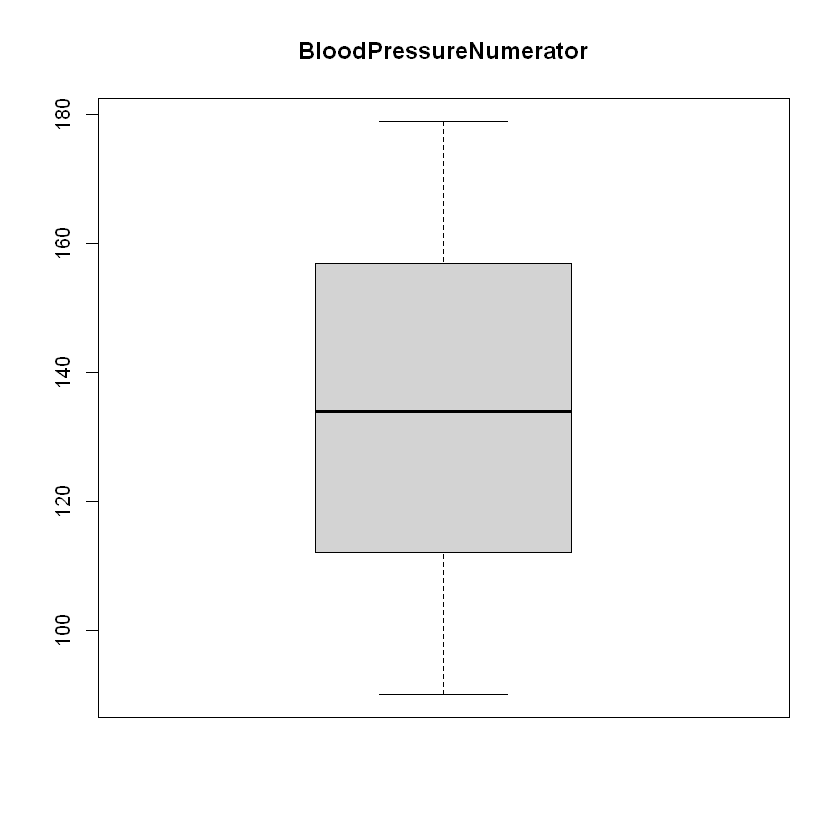

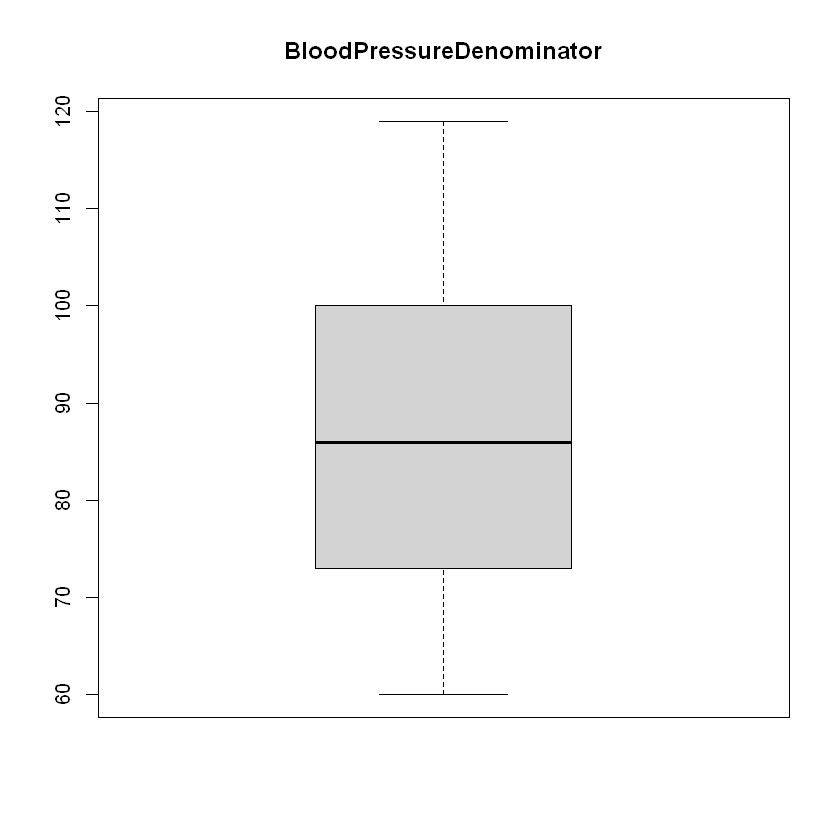

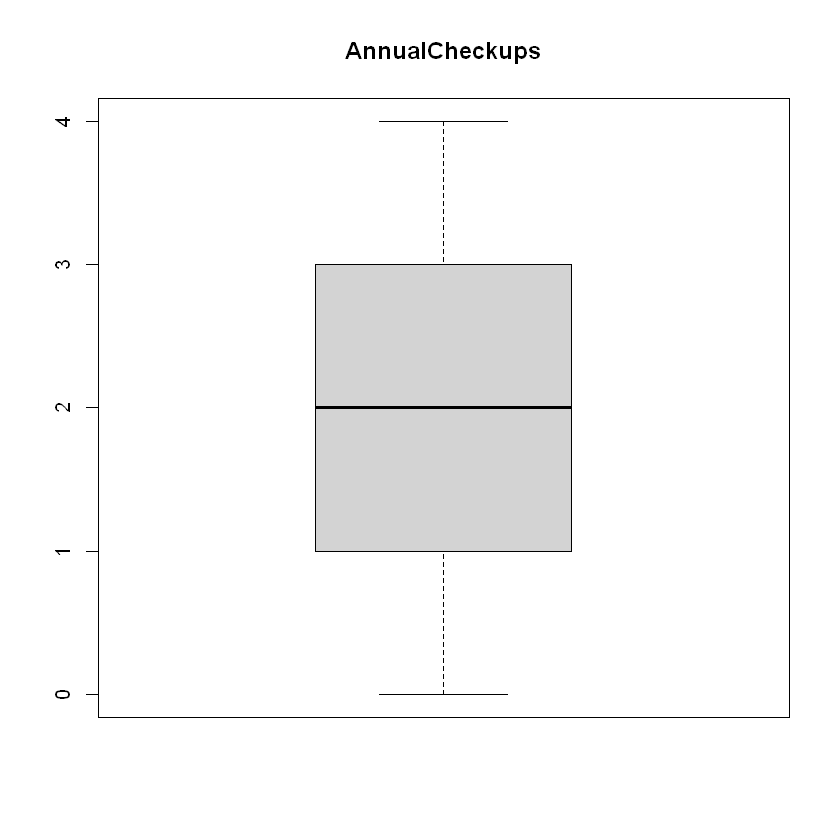

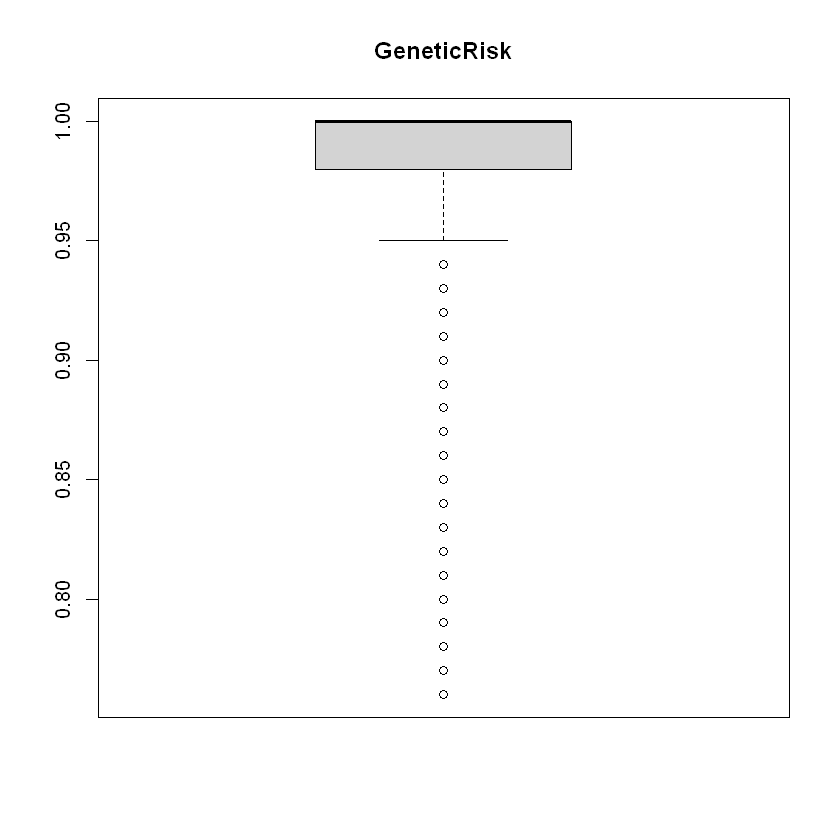

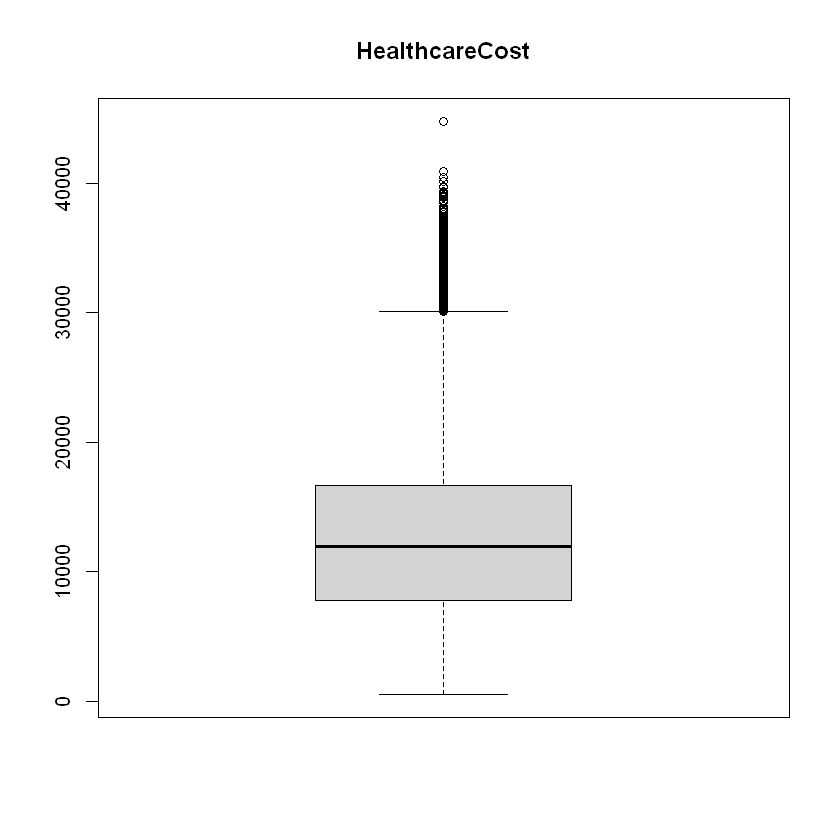

In [108]:
for (e in colnames(numeric_data)){
    boxplot(health_data_clean[[e]], main = e)
    #print(plots)
}

In [109]:
at_risk = health_data_clean %>% filter(Outcome=="At Risk")
health = health_data_clean %>% filter(Outcome=="Healthy") 
critical = health_data_clean %>% filter(Outcome=="Critical")

In [110]:
mean_at_risk <- colMeans(select(at_risk, where(is.numeric)), na.rm = TRUE)
mean_health <- colMeans(select(health, where(is.numeric)), na.rm = TRUE)
mean_critical <- colMeans(select(critical, where(is.numeric)), na.rm = TRUE)

In [111]:
mean_df <- data.frame(
  variable = names(mean_at_risk),
  At_Risk = mean_at_risk,
  Healthy = mean_health,
  Critical = mean_critical
)


mean_df_long <- pivot_longer(mean_df, cols = -variable, names_to = "Group", values_to = "Mean")

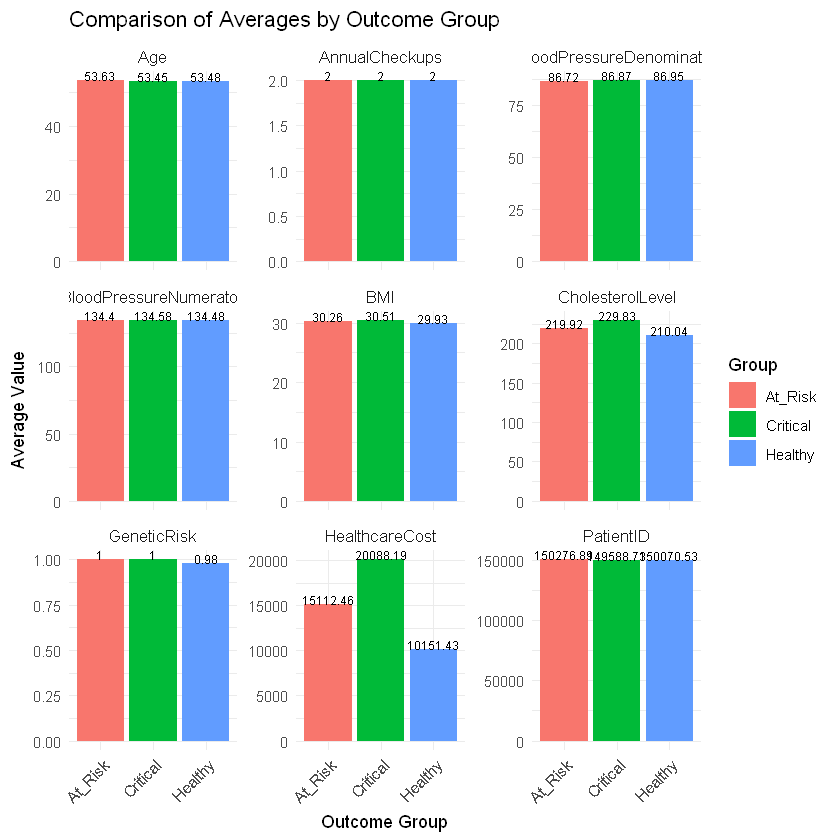

In [112]:
ggplot(mean_df_long, aes(x = Group, y = Mean, fill = Group)) +
  geom_bar(stat = "identity", position = "dodge") +
  
 
  geom_text(aes(label = round(Mean, 2)), 
            position = position_dodge(width = 0.9), 
            vjust = 0, size = 2.5) +  
  
  facet_wrap(~ variable, scales = "free_y") +
  theme_minimal() +
  labs(title = "Comparison of Averages by Outcome Group",
       x = "Outcome Group",
       y = "Average Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 10))

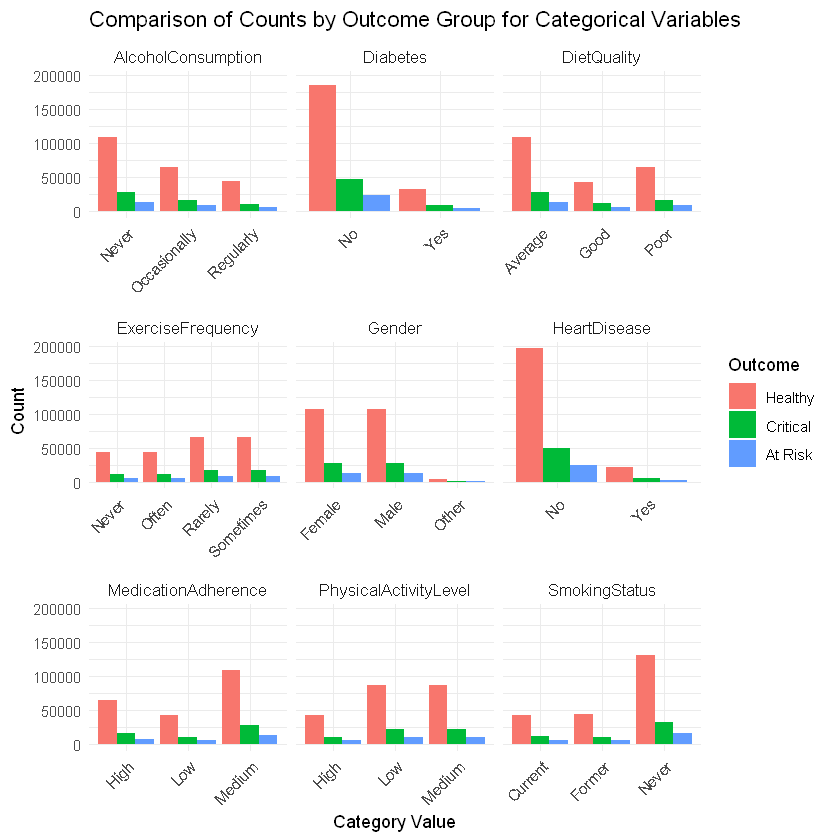

In [113]:
long_data <- pivot_longer(
  health_data_clean,
  cols = c(Gender, SmokingStatus, AlcoholConsumption, ExerciseFrequency, PhysicalActivityLevel, DietQuality, MedicationAdherence,Diabetes,HeartDisease),
  names_to = "Variable",
  values_to = "Value"
)

ggplot(long_data, aes(x = Value, fill = Outcome)) +
  geom_bar(position = "dodge") +  
  facet_wrap(~ Variable, scales = "free_x") +  
  theme_minimal() +
  labs(title = "Comparison of Counts by Outcome Group for Categorical Variables",
       x = "Category Value",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        strip.text = element_text(size = 10))  

Linear Regression

In [161]:
summary(lm(HealthcareCost~Outcome_Healthy+Outcome_Critical+GeneticRisk+PhysicalActivityLevel_High,data = health_data_lm))


Call:
lm(formula = HealthcareCost ~ Outcome_Healthy + Outcome_Critical + 
    GeneticRisk + PhysicalActivityLevel_High, data = health_data_lm)

Residuals:
     Min       1Q   Median       3Q      Max 
-17190.0  -3708.1    -79.5   3541.8  24671.0 

Coefficients:
                           Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                15975.67     382.55   41.761   <2e-16 ***
Outcome_Healthy            -4978.15      34.27 -145.284   <2e-16 ***
Outcome_Critical            4975.75      38.49  129.257   <2e-16 ***
GeneticRisk                 -861.49     381.23   -2.260   0.0238 *  
PhysicalActivityLevel_High    -8.66      23.79   -0.364   0.7158    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5202 on 299995 degrees of freedom
Multiple R-squared:  0.3601,	Adjusted R-squared:  0.3601 
F-statistic: 4.22e+04 on 4 and 299995 DF,  p-value: < 2.2e-16


In [39]:
health_data_lm_1 <- subset(health_data_lm, select = -c(Gender,SmokingStatus,AlcoholConsumption,ExerciseFrequency,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,Outcome,PatientID,
log_HealthcareCost,
SmokingStatus_Never,AlcoholConsumption_Never,ExerciseFrequency_Never,Diabetes_No,HeartDisease_No,PhysicalActivityLevel_Low,DietQuality_Average,MedicationAdherence_Medium,Outcome_Healthy,
Gender_Male,log_CholesterolLevel,log_GeneticRisk,log_BMI,log_HealthcareCost,Outcome_Critical,`Outcome_At Risk`))

In [40]:
health_data_lm_2 <- subset(health_data_lm, select = -c(Gender,SmokingStatus,AlcoholConsumption,ExerciseFrequency,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,Outcome,PatientID,HealthcareCost,
SmokingStatus_Never,AlcoholConsumption_Never,ExerciseFrequency_Never,Diabetes_No,HeartDisease_No,PhysicalActivityLevel_Low,DietQuality_Average,MedicationAdherence_Medium,Outcome_Healthy,Gender_Male,log_CholesterolLevel,log_GeneticRisk,log_BMI,Outcome_Critical,`Outcome_At Risk`))

In [24]:
test_lm = lm(HealthcareCost~.,data=health_data_lm_1)

In [37]:
summary(lm(HealthcareCost~CholesterolLevel+GeneticRisk,
data = health_data_lm))


Call:
lm(formula = HealthcareCost ~ CholesterolLevel + GeneticRisk, 
    data = health_data_lm)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2726 -0.6975 -0.0486  0.6479  4.6101 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -6.641794   0.066468  -99.92   <2e-16 ***
CholesterolLevel  0.129367   0.001783   72.57   <2e-16 ***
GeneticRisk       6.738758   0.067415   99.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9737 on 299997 degrees of freedom
Multiple R-squared:  0.05193,	Adjusted R-squared:  0.05192 
F-statistic:  8216 on 2 and 299997 DF,  p-value: < 2.2e-16


In [26]:
test_lm <- step(test_lm, direction = "backward", trace = 0)

In [27]:
summary(test_lm)


Call:
lm(formula = HealthcareCost ~ BMI + CholesterolLevel + GeneticRisk + 
    ExerciseFrequency_Sometimes, data = health_data_lm_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-15059.0  -4536.2   -314.9   4209.2  30000.4 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -3.704e+04  4.375e+02 -84.673   <2e-16 ***
BMI                          2.801e+01  2.293e+00  12.217   <2e-16 ***
CholesterolLevel             2.582e+01  3.572e-01  72.290   <2e-16 ***
GeneticRisk                  4.374e+04  4.383e+02  99.777   <2e-16 ***
ExerciseFrequency_Sometimes -4.222e+01  2.523e+01  -1.674   0.0942 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6330 on 299995 degrees of freedom
Multiple R-squared:  0.05241,	Adjusted R-squared:  0.0524 
F-statistic:  4148 on 4 and 299995 DF,  p-value: < 2.2e-16


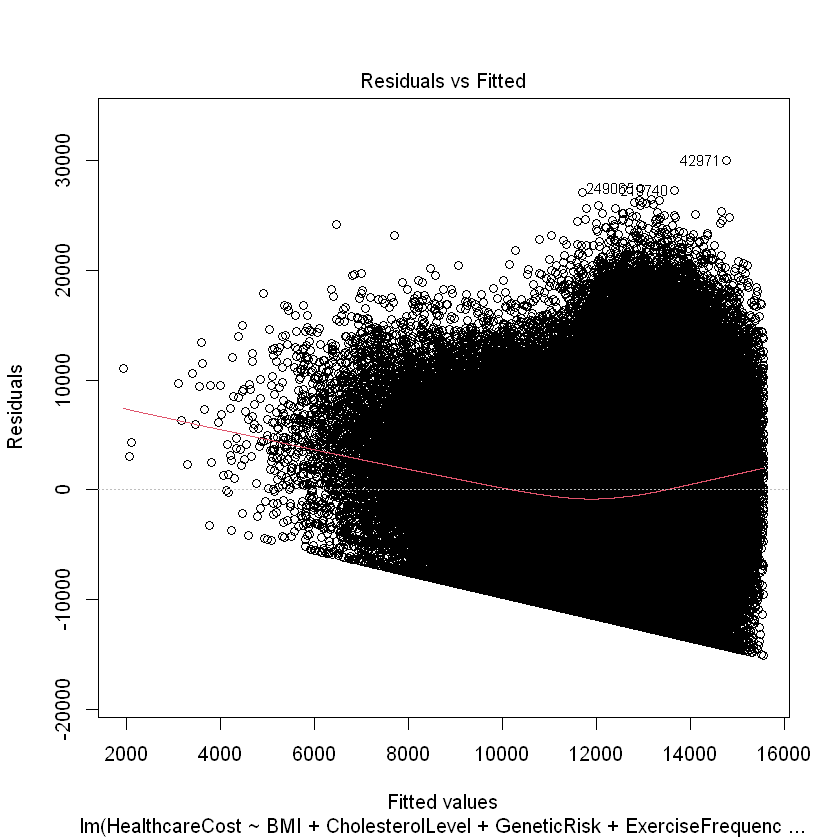

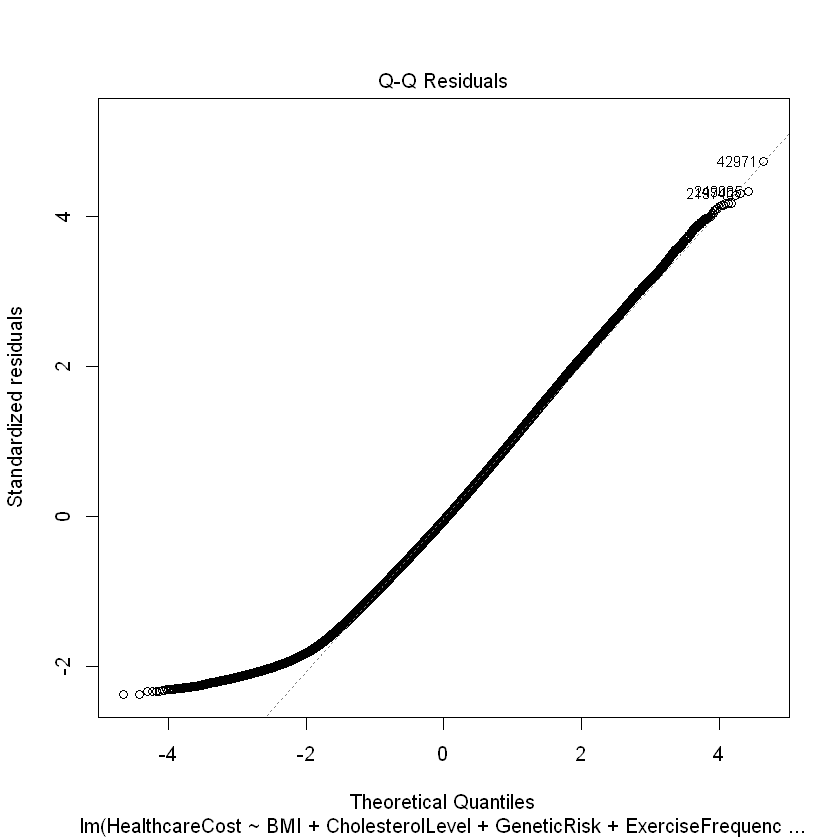

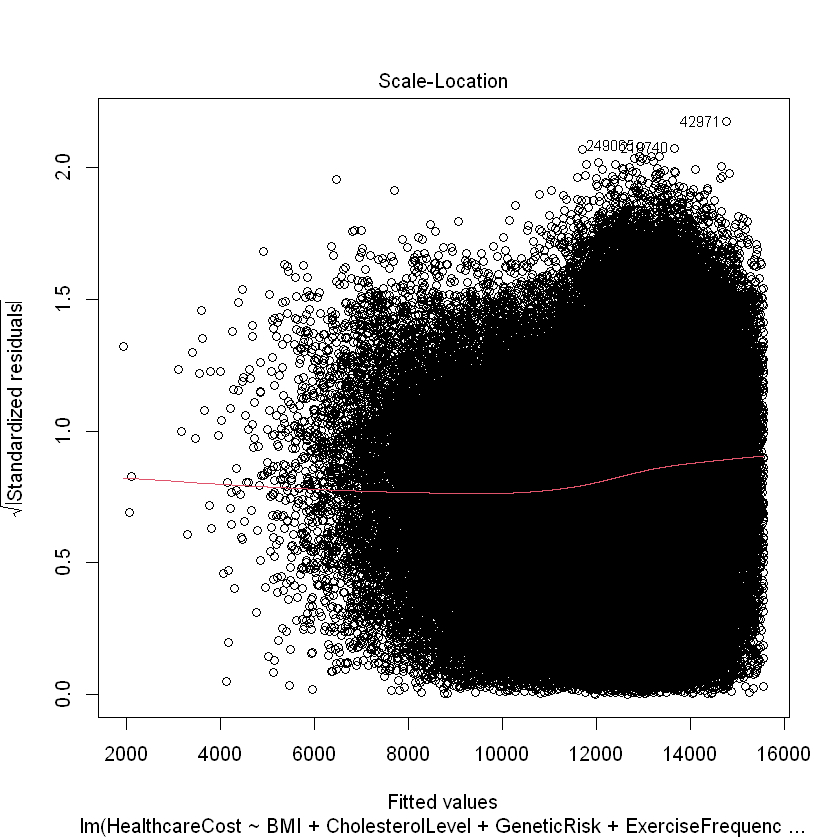

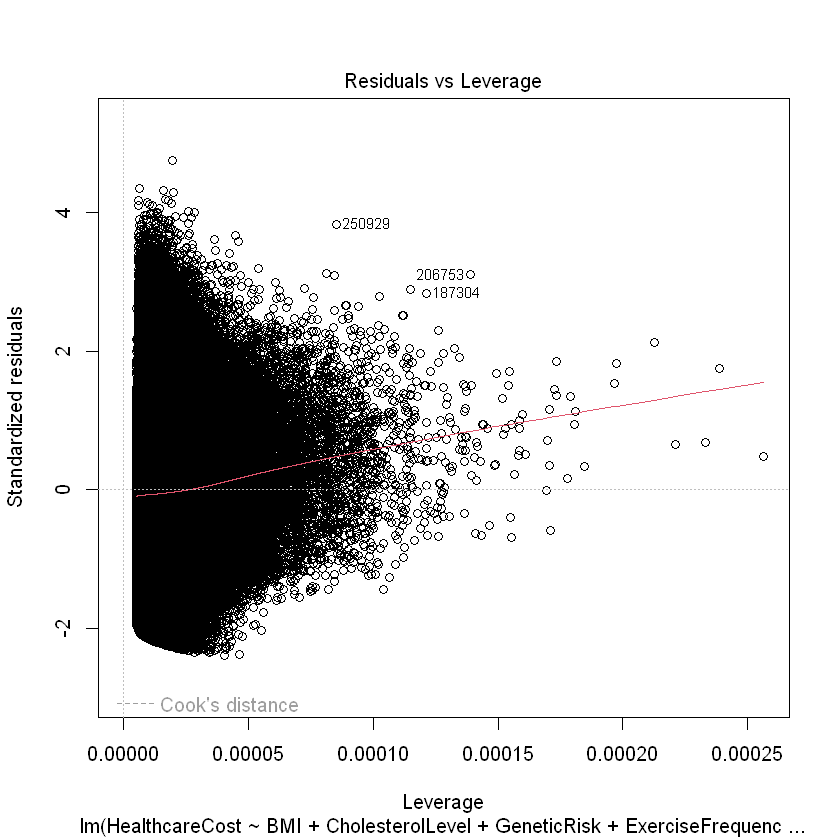

In [28]:
plot(test_lm)

In [42]:
test_lm_1 = lm(HealthcareCost~.,data=health_data_lm_1)
summary(test_lm_1)


Call:
lm(formula = HealthcareCost ~ ., data = health_data_lm_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3123 -0.6974 -0.0483  0.6472  4.6197 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -6.6319321  0.0667517 -99.352   <2e-16 ***
Age                             -0.0007166  0.0017774  -0.403    0.687    
BMI                              0.0217296  0.0017781  12.221   <2e-16 ***
CholesterolLevel                 0.1288894  0.0017828  72.295   <2e-16 ***
BloodPressureNumerator           0.0018966  0.0018166   1.044    0.296    
BloodPressureDenominator        -0.0011938  0.0018166  -0.657    0.511    
AnnualCheckups                   0.0011451  0.0012562   0.912    0.362    
GeneticRisk                      6.7252139  0.0674099  99.766   <2e-16 ***
Gender_Female                    0.0045389  0.0035914   1.264    0.206    
Gender_Other                    -0.0000100  0.0127307  -0.001    0.999    
S

In [30]:
test_lm_backwards <- step(test_lm_1, direction = "backward", trace = 0)

In [31]:
summary(test_lm_backwards)


Call:
lm(formula = log_HealthcareCost ~ BMI + CholesterolLevel + GeneticRisk, 
    data = health_data_lm_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2822 -0.2561  0.1751  0.4939  1.6536 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.7440536  0.0530190  89.478   <2e-16 ***
BMI              0.0024102  0.0002779   8.672   <2e-16 ***
CholesterolLevel 0.0022978  0.0000433  53.072   <2e-16 ***
GeneticRisk      3.9670546  0.0531324  74.664   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7673 on 299996 degrees of freedom
Multiple R-squared:  0.02962,	Adjusted R-squared:  0.02961 
F-statistic:  3052 on 3 and 299996 DF,  p-value: < 2.2e-16


In [34]:
library(e1071)

In [118]:
clustering_data = subset(health_data_lm, select = -c(Outcome_Healthy, Outcome_Critical,`Outcome_At Risk`))



In [119]:
head(clustering_data)

,Age,BMI,CholesterolLevel,BloodPressureNumerator,BloodPressureDenominator,AnnualCheckups,GeneticRisk,HealthcareCost,Gender_Male,Gender_Female,⋯,HeartDisease_Yes,PhysicalActivityLevel_Low,PhysicalActivityLevel_Medium,PhysicalActivityLevel_High,DietQuality_Average,DietQuality_Good,DietQuality_Poor,MedicationAdherence_Medium,MedicationAdherence_High,MedicationAdherence_Low
1,1.3713125,-0.4641360,-1.3582832,-0.4039493,-0.4151675,5.654056e-05,-3.6156621,1.31349248,1.0254282,-0.9846166,⋯,3.0119455,1.2254150,-0.8187424,-0.4983476,0.9977409,-0.4996971,-0.6531929,0.9972887,-0.6529904,-0.499546
2,0.4093303,-0.7824921,-0.9515588,0.7898919,-0.7154040,-7.067005e-01,-1.3466784,0.03996491,-0.9751991,1.0156203,⋯,-0.3320102,1.2254150,-0.8187424,-0.4983476,-1.0022609,2.0012058,-0.6531929,0.9972887,-0.6529904,-0.499546
3,-1.3222377,1.4965344,1.2939160,-1.3282134,0.5455890,-7.067005e-01,0.5441414,0.10303416,-0.9751991,1.0156203,⋯,-0.3320102,-0.8160474,1.2213813,-0.4983476,0.9977409,-0.4996971,-0.6531929,-1.0027154,1.5314110,-0.499546
4,0.5055285,0.6051777,-1.5745152,0.9439359,-0.2950730,7.068136e-01,0.5441414,0.53618605,1.0254282,-0.9846166,⋯,-0.3320102,-0.8160474,1.2213813,-0.4983476,0.9977409,-0.4996971,-0.6531929,0.9972887,-0.6529904,-0.499546
5,-0.9374448,0.1188408,1.0054178,-0.1343722,-0.4151675,1.413571e+00,0.5441414,0.93750576,-0.9751991,1.0156203,⋯,-0.3320102,-0.8160474,1.2213813,-0.4983476,0.9977409,-0.4996971,-0.6531929,-1.0027154,1.5314110,-0.499546
6,-0.9374448,-0.3848817,-1.2755950,0.3662709,0.3654472,7.068136e-01,-0.5903505,0.07642888,1.0254282,-0.9846166,⋯,-0.3320102,-0.8160474,1.2213813,-0.4983476,-1.0022609,-0.4996971,1.5309362,0.9972887,-0.6529904,-0.499546


In [130]:
test=kmeans(x=numeric_data,centers = 3,nstart = 25)

In [131]:
health_data_clean$cluster = test$cluster

In [124]:
library(cluster)

In [126]:
hc = hclust(clustering_data, method = "average")

ERROR: Error in if (is.na(n) || n > 65536L) stop("size cannot be NA nor exceed 65536"): missing value where TRUE/FALSE needed


Random Forest Linear Regression

In [14]:
library(randomForest)
library(ranger)

Warning message:
"package 'randomForest' was built under R version 4.3.3"


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ranger' was built under R version 4.3.3"

Attaching package: 'ranger'


The following object is masked from 'package:randomForest':

    importance




In [12]:
rand_forest_ranger <- ranger(
  HealthcareCost ~ ., 
  data = health_data_lm, 
  mtry = 3, 
  num.trees = 100, 
  importance = 'impurity'
)

Growing trees.. Progress: 76%. Estimated remaining time: 9 seconds.


In [13]:
print(rand_forest_ranger)

Ranger result

Call:
 ranger(HealthcareCost ~ ., data = health_data_lm, mtry = 3, num.trees = 100,      importance = "impurity") 

Type:                             Regression 
Number of trees:                  100 
Sample size:                      300000 
Number of independent variables:  36 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         impurity 
Splitrule:                        variance 
OOB prediction error (MSE):       27418632 
R squared (OOB):                  0.3515885 


In [20]:
importance_score = rand_forest_ranger$variable.importance

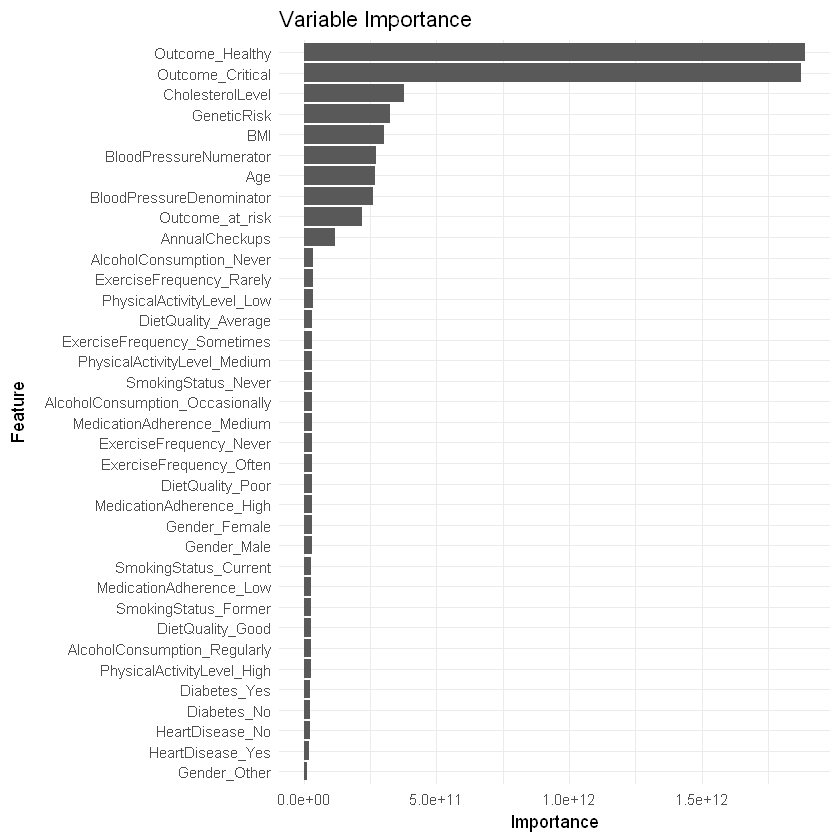

In [24]:
importance_score = rand_forest_ranger$variable.importance
important_vars_df = data.frame(Variables = names(importance_score),Score= importance_score)

ggplot(important_vars_df, aes(x = reorder(Variables, Score), y = Score)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance",
       x = "Feature",
       y = "Importance") +
  theme_minimal()

In [34]:
head(health_data_lm)

,Age,BMI,CholesterolLevel,BloodPressureNumerator,BloodPressureDenominator,AnnualCheckups,GeneticRisk,HealthcareCost,Gender_Female,Gender_Male,⋯,DietQuality_Average,DietQuality_Good,DietQuality_Poor,MedicationAdherence_High,MedicationAdherence_Low,MedicationAdherence_Medium,Outcome_at_risk,Outcome_Critical,Outcome_Healthy,BMIxAge
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,82,27.72798,170.5041,124,80,2,0.89,20974.84,0,1,⋯,1,0,0,0,0,1,0,0,1,24.67790
2,62,26.12258,183.7046,155,75,1,0.95,12693.40,1,0,⋯,0,1,0,0,0,1,0,0,1,24.81645
3,26,37.61520,256.5829,100,96,1,1.00,13103.52,1,0,⋯,1,0,0,1,0,0,0,1,0,37.61520
4,64,33.12029,163.4861,159,82,3,1.00,15920.20,0,1,⋯,1,0,0,0,0,1,0,0,1,33.12029
5,34,30.66780,247.2195,131,80,4,1.00,18529.89,1,0,⋯,1,0,0,1,0,0,0,1,0,30.66780
6,34,28.12764,173.1878,144,93,3,0.97,12930.51,0,1,⋯,0,0,1,0,0,1,0,0,1,27.28381


In [39]:
health_data_lm$genriskxclevel = health_data_lm$GeneticRisk*health_data_lm$CholesterolLevel 

In [43]:
summary(lm(HealthcareCost ~ genriskxclevel+Age+BMI+Outcome_Critical+Outcome_Healthy,data = health_data_lm))


Call:
lm(formula = HealthcareCost ~ genriskxclevel + Age + BMI + Outcome_Critical + 
    Outcome_Healthy, data = health_data_lm)

Residuals:
     Min       1Q   Median       3Q      Max 
-17204.2  -3708.2    -81.1   3543.2  24687.1 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       1.515e+04  9.548e+01  158.692   <2e-16 ***
genriskxclevel   -3.139e-01  3.016e-01   -1.041    0.298    
Age               9.108e-02  4.568e-01    0.199    0.842    
BMI               7.945e-01  1.886e+00    0.421    0.674    
Outcome_Critical  4.979e+03  3.861e+01  128.936   <2e-16 ***
Outcome_Healthy  -4.965e+03  3.369e+01 -147.374   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5202 on 299994 degrees of freedom
Multiple R-squared:  0.3601,	Adjusted R-squared:   0.36 
F-statistic: 3.376e+04 on 5 and 299994 DF,  p-value: < 2.2e-16


Logistic Regression Random Forest

In [15]:
install.packages("nnet")
library(nnet)

Installing package into 'C:/Users/Will/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Will\AppData\Local\Temp\RtmpEXsNvL\downloaded_packages


Warning message:
"package 'nnet' was built under R version 4.3.3"


In [16]:
health_data_log_reg = dummy_cols(health_data,select_columns = c("Gender","SmokingStatus","AlcoholConsumption","ExerciseFrequency","Diabetes","HeartDisease","PhysicalActivityLevel","DietQuality","MedicationAdherence"))
health_data_log_reg$Outcome <- as.factor(health_data_log_reg$Outcome)

In [14]:
multi_log_model <- multinom(Outcome ~ ., data = health_data_log_reg)

# weights:  162 (106 variable)
initial  value 329583.686601 
iter  10 value 191136.467307
iter  20 value 183586.599385
iter  30 value 178916.060557
iter  40 value 173257.078644
iter  50 value 156516.526097
iter  60 value 136459.747421
iter  70 value 132419.068641
iter  80 value 132403.532835
final  value 132403.491786 
converged


In [15]:
summary(multi_log_model)

Call:
multinom(formula = Outcome ~ ., data = health_data_log_reg)

Coefficients:
         (Intercept)     PatientID           Age GenderMale GenderOther
Critical   -64.93623 -9.943487e-08 -0.0006892460  -16.23513   -16.23354
Healthy    269.02026 -5.060917e-08 -0.0001789553   67.26603    67.22856
                  BMI SmokingStatusFormer SmokingStatusNever
Critical  0.009114409           -16.24891          -16.24715
Healthy  -0.010897177            67.24978           67.24618
         AlcoholConsumptionOccasionally AlcoholConsumptionRegularly
Critical                       -16.2401                   -16.24018
Healthy                         67.2524                    67.25135
         ExerciseFrequencyOften ExerciseFrequencyRarely
Critical              -12.97737               -12.99831
Healthy                53.81038                53.79546
         ExerciseFrequencySometimes CholesterolLevel BloodPressureNumerator
Critical                  -12.97714       0.01011635           0.0002066

In [18]:
rand_forest_log <- ranger(
  Outcome ~ ., 
  data = health_data_log_reg, 
  mtry = 3, 
  num.trees = 100, 
  importance = 'impurity'
)
print(rand_forest_log)



Growing trees.. Progress: 91%. Estimated remaining time: 3 seconds.
Ranger result

Call:
 ranger(Outcome ~ ., data = health_data_log_reg, mtry = 3, num.trees = 100,      importance = "impurity") 

Type:                             Classification 
Number of trees:                  100 
Sample size:                      300000 
Number of independent variables:  44 
Mtry:                             3 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error:             18.68 % 


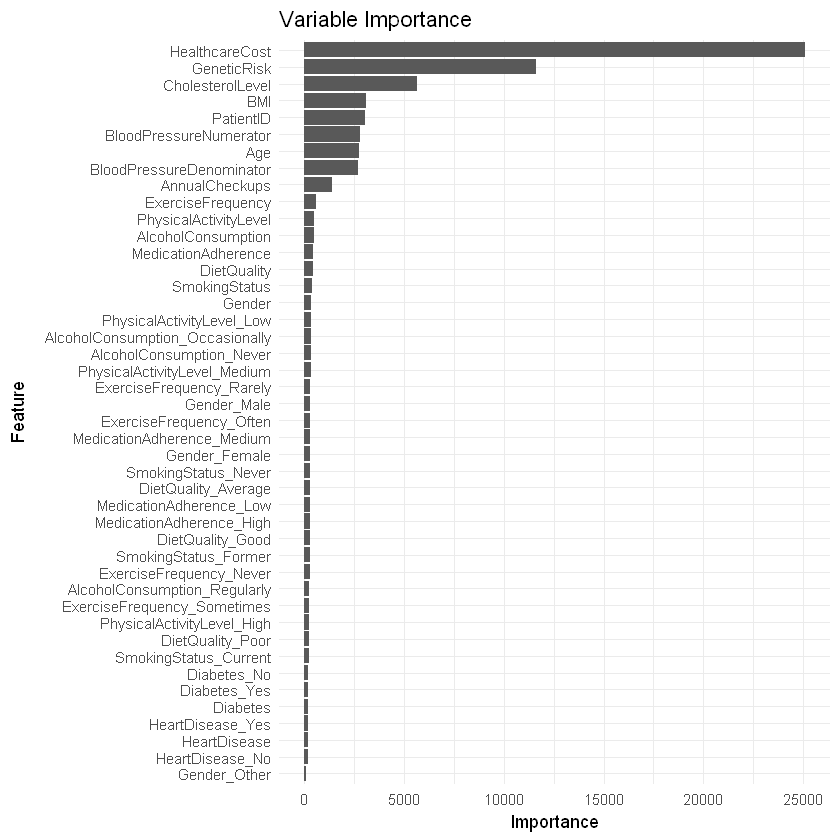

In [19]:
importance_scores = rand_forest_log$variable.importance
important_vars_df_log = data.frame(Variables = names(importance_scores),Score= importance_scores)

ggplot(important_vars_df_log, aes(x = reorder(Variables, Score), y = Score)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance",
       x = "Feature",
       y = "Importance") +
  theme_minimal()

Elastic Net

In [17]:
library(glmnet)
library(MASS)
library(caret)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: lattice



In [18]:
custom = trainControl(method = "repeatedcv",

                       number = 10,

                       repeats = 5,

                       verboseIter = TRUE)


e_net = train(HealthcareCost~.,health_data_lm,method="glmnet",tuneGrid =expand.grid(alpha=seq(0,1,length=10),
                                  lambda = seq(0.0001,0.2,length=5)),trControl=custom)

+ Fold01.Rep1: alpha=0.0000, lambda=0.2 
- Fold01.Rep1: alpha=0.0000, lambda=0.2 
+ Fold01.Rep1: alpha=0.1111, lambda=0.2 
- Fold01.Rep1: alpha=0.1111, lambda=0.2 
+ Fold01.Rep1: alpha=0.2222, lambda=0.2 
- Fold01.Rep1: alpha=0.2222, lambda=0.2 
+ Fold01.Rep1: alpha=0.3333, lambda=0.2 
- Fold01.Rep1: alpha=0.3333, lambda=0.2 
+ Fold01.Rep1: alpha=0.4444, lambda=0.2 
- Fold01.Rep1: alpha=0.4444, lambda=0.2 
+ Fold01.Rep1: alpha=0.5556, lambda=0.2 
- Fold01.Rep1: alpha=0.5556, lambda=0.2 
+ Fold01.Rep1: alpha=0.6667, lambda=0.2 
- Fold01.Rep1: alpha=0.6667, lambda=0.2 
+ Fold01.Rep1: alpha=0.7778, lambda=0.2 
- Fold01.Rep1: alpha=0.7778, lambda=0.2 
+ Fold01.Rep1: alpha=0.8889, lambda=0.2 
- Fold01.Rep1: alpha=0.8889, lambda=0.2 
+ Fold01.Rep1: alpha=1.0000, lambda=0.2 
- Fold01.Rep1: alpha=1.0000, lambda=0.2 
+ Fold02.Rep1: alpha=0.0000, lambda=0.2 
- Fold02.Rep1: alpha=0.0000, lambda=0.2 
+ Fold02.Rep1: alpha=0.1111, lambda=0.2 
- Fold02.Rep1: alpha=0.1111, lambda=0.2 
+ Fold02.Rep1: a

Warning message:
"model fit failed for Fold03.Rep3: alpha=0.8889, lambda=0.2 Error : cannot allocate vector of size 74.2 Mb
"


- Fold03.Rep3: alpha=0.8889, lambda=0.2 
+ Fold03.Rep3: alpha=1.0000, lambda=0.2 
- Fold03.Rep3: alpha=1.0000, lambda=0.2 
+ Fold04.Rep3: alpha=0.0000, lambda=0.2 
- Fold04.Rep3: alpha=0.0000, lambda=0.2 
+ Fold04.Rep3: alpha=0.1111, lambda=0.2 
- Fold04.Rep3: alpha=0.1111, lambda=0.2 
+ Fold04.Rep3: alpha=0.2222, lambda=0.2 
- Fold04.Rep3: alpha=0.2222, lambda=0.2 
+ Fold04.Rep3: alpha=0.3333, lambda=0.2 
- Fold04.Rep3: alpha=0.3333, lambda=0.2 
+ Fold04.Rep3: alpha=0.4444, lambda=0.2 
- Fold04.Rep3: alpha=0.4444, lambda=0.2 
+ Fold04.Rep3: alpha=0.5556, lambda=0.2 
- Fold04.Rep3: alpha=0.5556, lambda=0.2 
+ Fold04.Rep3: alpha=0.6667, lambda=0.2 
- Fold04.Rep3: alpha=0.6667, lambda=0.2 
+ Fold04.Rep3: alpha=0.7778, lambda=0.2 
- Fold04.Rep3: alpha=0.7778, lambda=0.2 
+ Fold04.Rep3: alpha=0.8889, lambda=0.2 
- Fold04.Rep3: alpha=0.8889, lambda=0.2 
+ Fold04.Rep3: alpha=1.0000, lambda=0.2 
- Fold04.Rep3: alpha=1.0000, lambda=0.2 
+ Fold05.Rep3: alpha=0.0000, lambda=0.2 
- Fold05.Rep3: a

Warning message:
"model fit failed for Fold08.Rep4: alpha=0.5556, lambda=0.2 Error : cannot allocate vector of size 74.2 Mb
"


- Fold08.Rep4: alpha=0.5556, lambda=0.2 
+ Fold08.Rep4: alpha=0.6667, lambda=0.2 
- Fold08.Rep4: alpha=0.6667, lambda=0.2 
+ Fold08.Rep4: alpha=0.7778, lambda=0.2 
- Fold08.Rep4: alpha=0.7778, lambda=0.2 
+ Fold08.Rep4: alpha=0.8889, lambda=0.2 
- Fold08.Rep4: alpha=0.8889, lambda=0.2 
+ Fold08.Rep4: alpha=1.0000, lambda=0.2 
- Fold08.Rep4: alpha=1.0000, lambda=0.2 
+ Fold09.Rep4: alpha=0.0000, lambda=0.2 
- Fold09.Rep4: alpha=0.0000, lambda=0.2 
+ Fold09.Rep4: alpha=0.1111, lambda=0.2 
- Fold09.Rep4: alpha=0.1111, lambda=0.2 
+ Fold09.Rep4: alpha=0.2222, lambda=0.2 
- Fold09.Rep4: alpha=0.2222, lambda=0.2 
+ Fold09.Rep4: alpha=0.3333, lambda=0.2 
- Fold09.Rep4: alpha=0.3333, lambda=0.2 
+ Fold09.Rep4: alpha=0.4444, lambda=0.2 
- Fold09.Rep4: alpha=0.4444, lambda=0.2 
+ Fold09.Rep4: alpha=0.5556, lambda=0.2 
- Fold09.Rep4: alpha=0.5556, lambda=0.2 
+ Fold09.Rep4: alpha=0.6667, lambda=0.2 
- Fold09.Rep4: alpha=0.6667, lambda=0.2 
+ Fold09.Rep4: alpha=0.7778, lambda=0.2 
- Fold09.Rep4: a

Warning message:
"model fit failed for Fold04.Rep5: alpha=0.6667, lambda=0.2 Error : cannot allocate vector of size 74.2 Mb
"


- Fold04.Rep5: alpha=0.6667, lambda=0.2 
+ Fold04.Rep5: alpha=0.7778, lambda=0.2 
- Fold04.Rep5: alpha=0.7778, lambda=0.2 
+ Fold04.Rep5: alpha=0.8889, lambda=0.2 
- Fold04.Rep5: alpha=0.8889, lambda=0.2 
+ Fold04.Rep5: alpha=1.0000, lambda=0.2 
- Fold04.Rep5: alpha=1.0000, lambda=0.2 
+ Fold05.Rep5: alpha=0.0000, lambda=0.2 
- Fold05.Rep5: alpha=0.0000, lambda=0.2 
+ Fold05.Rep5: alpha=0.1111, lambda=0.2 
- Fold05.Rep5: alpha=0.1111, lambda=0.2 
+ Fold05.Rep5: alpha=0.2222, lambda=0.2 
- Fold05.Rep5: alpha=0.2222, lambda=0.2 
+ Fold05.Rep5: alpha=0.3333, lambda=0.2 
- Fold05.Rep5: alpha=0.3333, lambda=0.2 
+ Fold05.Rep5: alpha=0.4444, lambda=0.2 
- Fold05.Rep5: alpha=0.4444, lambda=0.2 
+ Fold05.Rep5: alpha=0.5556, lambda=0.2 
- Fold05.Rep5: alpha=0.5556, lambda=0.2 
+ Fold05.Rep5: alpha=0.6667, lambda=0.2 
- Fold05.Rep5: alpha=0.6667, lambda=0.2 
+ Fold05.Rep5: alpha=0.7778, lambda=0.2 
- Fold05.Rep5: alpha=0.7778, lambda=0.2 
+ Fold05.Rep5: alpha=0.8889, lambda=0.2 
- Fold05.Rep5: a

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Aggregating results
Selecting tuning parameters
Fitting alpha = 1, lambda = 0.2 on full training set


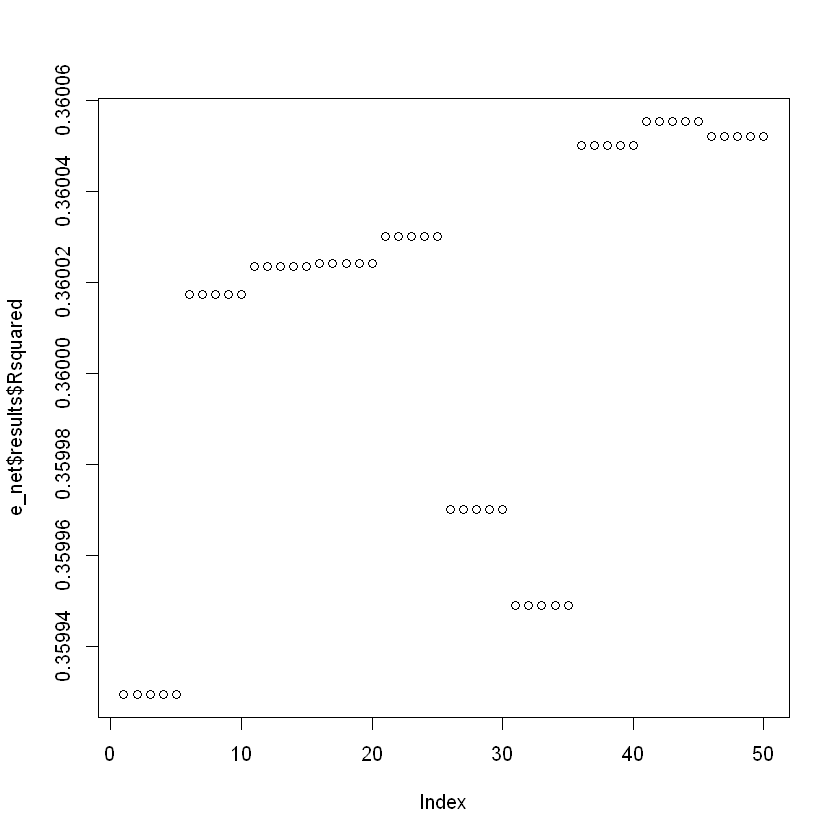

In [21]:
plot(x=e_net$results$Rsquared,y=e_net$)

In [25]:
e_net$finalModel

: 